In [1]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [13]:
from langchain_google_genai import GoogleGenerativeAI


In [14]:
chat_llm = GoogleGenerativeAI(model="gemini-3-flash-preview") 

In [15]:
chat_llm.invoke("What is the capital of France?")

'The capital of France is **Paris**.'

In [16]:
from typing_extensions import Annotated, NotRequired, TypedDict
import operator

In [18]:
from langchain_core.messages import AnyMessage,HumanMessage,AIMessage

In [19]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage],operator.add]

In [20]:
def llm_call(state:GraphState)->dict:
    """call the llm with the messages in the state and return the response as a new message"""
    response = chat_llm.invoke(state["messages"])
    return{
        "messages": [response]
    }

In [33]:
def token_counter(state: GraphState) -> dict:
    last_message = state["messages"][-1]

    # Handle both string and message object
    if hasattr(last_message, "content"):
        text = last_message.content
    else:
        text = str(last_message)

    tokens = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {tokens}"

    return {"token_summary": summary}


In [34]:
from langgraph.graph import StateGraph

In [35]:
builder = StateGraph(GraphState)

In [36]:
builder.add_node('llm_call', llm_call)
builder.add_node('token_counter', token_counter)



In [37]:
builder.set_entry_point('llm_call')
builder.add_edge('llm_call', 'token_counter')
builder.set_finish_point('token_counter')



In [38]:
app=builder.compile()

In [39]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [40]:
from IPython.display import Image,display

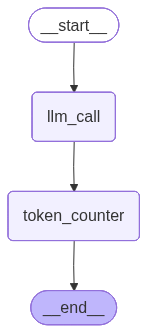

In [41]:
display(Image(app.get_graph().draw_mermaid_png()))


In [42]:
result = app.invoke({
    "messages":[HumanMessage(content="Tell about the TVK Party?")]
    })

In [43]:
result

{'messages': [HumanMessage(content='Tell about the TVK Party?', additional_kwargs={}, response_metadata={}),
  'The **Tamilaga Vettri Kazhagam (TVK)** is a regional political party in the Indian state of Tamil Nadu, founded by the popular Tamil cinema actor **Vijay** (often referred to by fans as "Thalapathy").\n\nThe party’s emergence is seen as a significant shift in the political landscape of Tamil Nadu, a state with a long history of actors successfully transitioning into politics (such as M.G. Ramachandran and J. Jayalalithaa).\n\nHere is a detailed breakdown of the TVK party:\n\n### 1. Formation and Launch\n*   **Founder:** C. Joseph Vijay.\n*   **Launch Date:** February 2, 2024.\n*   **Headquarters:** Chennai, Tamil Nadu.\n*   **Objective:** Vijay announced that the party was formed to address the administrative malfunctions, corruption, and "divisive politics" currently affecting the state.\n\n### 2. The Party Flag and Symbol\n*   **The Flag:** Launched in August 2024, the flag

In [46]:
for e in result["messages"]:
    if hasattr(e, "content"):
        print(type(e).__name__, ":", e.content)
    else:
        print(type(e).__name__, ":", str(e))


HumanMessage : Tell about the TVK Party?
str : The **Tamilaga Vettri Kazhagam (TVK)** is a regional political party in the Indian state of Tamil Nadu, founded by the popular Tamil cinema actor **Vijay** (often referred to by fans as "Thalapathy").

The party’s emergence is seen as a significant shift in the political landscape of Tamil Nadu, a state with a long history of actors successfully transitioning into politics (such as M.G. Ramachandran and J. Jayalalithaa).

Here is a detailed breakdown of the TVK party:

### 1. Formation and Launch
*   **Founder:** C. Joseph Vijay.
*   **Launch Date:** February 2, 2024.
*   **Headquarters:** Chennai, Tamil Nadu.
*   **Objective:** Vijay announced that the party was formed to address the administrative malfunctions, corruption, and "divisive politics" currently affecting the state.

### 2. The Party Flag and Symbol
*   **The Flag:** Launched in August 2024, the flag features a **maroon and yellow** color scheme. In the center, there are two *

In [2]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [3]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)


In [4]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [5]:
wiki_tool.run({"query":"TVK Party"})

d:\AI-Agent\env\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\AI-Agent\env\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


'Page: Tamilaga Vettri Kazhagam\nSummary: Tamilaga Vettri Kazhagam (transl.\u2009Victory Party of Tamilakam; abbr. TVK) is an Indian regional political party active in the union territory of Puducherry and the state of Tamil Nadu. It was founded on 2 February 2024 by actor-turned-politician Vijay, who became its first president. The party is headquartered in Panaiyur, Chennai.\n\nPage: 2026 Tamil Nadu Legislative Assembly election\nSummary: Legislative Assembly elections are expected to be held in Tamil N'